# SVM Regression

### Dataset: Salary acc. to Year of experience

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_csv('Salary.csv')
df.head()

,Level,YearsExperience,Salary
0,1,1.1,39343
1,2,1.3,46205
2,3,1.5,37731
3,4,2.0,43525
4,5,2.2,39891


In [3]:
x=df.iloc[:,1:-1].values
y=df.iloc[:,-1].values

In [4]:
x_data=x
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5],
       [11.2],
       [11.5],
       [12.3],
       [12.9],
       [13.5]])

In [5]:
y=y.reshape(len(y),1)
y_data=y
y

array([[ 39343],
       [ 46205],
       [ 37731],
       [ 43525],
       [ 39891],
       [ 56642],
       [ 60150],
       [ 54445],
       [ 64445],
       [ 57189],
       [ 63218],
       [ 55794],
       [ 56957],
       [ 57081],
       [ 61111],
       [ 67938],
       [ 66029],
       [ 83088],
       [ 81363],
       [ 93940],
       [ 91738],
       [ 98273],
       [101302],
       [113812],
       [109431],
       [105582],
       [116969],
       [112635],
       [122391],
       [121872],
       [127345],
       [126756],
       [128765],
       [135675],
       [139465]], dtype=int64)

## Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
x = sc_X.fit_transform(x)
y = sc_y.fit_transform(y)

In [7]:
print(x)

[[-1.46039873]
 [-1.40432198]
 [-1.34824523]
 [-1.20805336]
 [-1.15197661]
 [-0.955708  ]
 [-0.92766962]
 [-0.87159288]
 [-0.87159288]
 [-0.73140101]
 [-0.67532426]
 [-0.64728589]
 [-0.64728589]
 [-0.61924751]
 [-0.50709402]
 [-0.39494052]
 [-0.33886377]
 [-0.28278703]
 [-0.11455678]
 [-0.08651841]
 [ 0.13778858]
 [ 0.2219037 ]
 [ 0.44621069]
 [ 0.53032581]
 [ 0.67051768]
 [ 0.7546328 ]
 [ 0.89482467]
 [ 0.92286305]
 [ 1.11913166]
 [ 1.17520841]
 [ 1.37147703]
 [ 1.45559215]
 [ 1.67989914]
 [ 1.84812938]
 [ 2.01635962]]


In [8]:
print(y)

[[-1.40702756]
 [-1.19055984]
 [-1.45787949]
 [-1.27510276]
 [-1.38974043]
 [-0.86131566]
 [-0.75065276]
 [-0.93062192]
 [-0.61516328]
 [-0.84406007]
 [-0.65387005]
 [-0.88806655]
 [-0.85137871]
 [-0.84746702]
 [-0.72033719]
 [-0.50497357]
 [-0.56519463]
 [-0.02705373]
 [-0.08147035]
 [ 0.31528198]
 [ 0.24581799]
 [ 0.45197021]
 [ 0.54752264]
 [ 0.9421614 ]
 [ 0.80395897]
 [ 0.68253893]
 [ 1.04175169]
 [ 0.90503191]
 [ 1.21279336]
 [ 1.19642106]
 [ 1.36907158]
 [ 1.35049106]
 [ 1.4138667 ]
 [ 1.63184862]
 [ 1.75140745]]


## Training the model, predicting the accuracy and visualisation

In [9]:
kernel=['linear','rbf','poly']

Accuracy by linear kernel 0.964831424838288


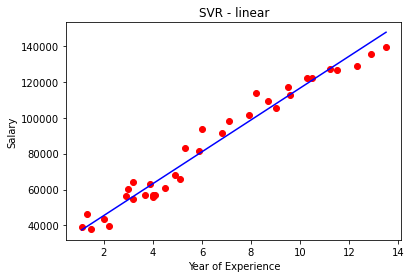

 
 
Accuracy by rbf kernel 0.9749605087921769


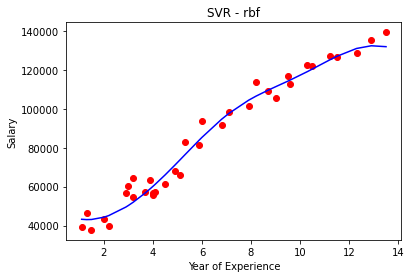

 
 
Accuracy by poly kernel 0.6371259952762403


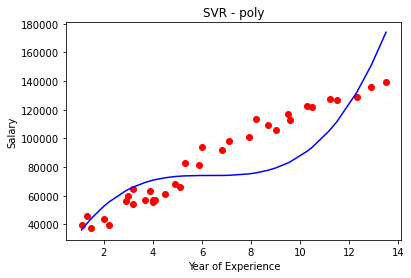

In [11]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score

for i in kernel:
    #MODEL TRAINING
    svr= SVR(kernel = i)
    svr.fit(x, y.ravel())
    
    #PREDICTING THE ACCURACY
    y_pred = sc_y.inverse_transform(svr.predict(sc_X.transform(x_data)))
    acc=r2_score(y_data, y_pred)
    
    print("Accuracy by "+i+" kernel",acc)
    
    #VISUALISATION
    plt.scatter(sc_X.inverse_transform(x), sc_y.inverse_transform(y), color = 'red')
    plt.plot(sc_X.inverse_transform(x), sc_y.inverse_transform(svr.predict(x)), color = 'blue')
    plt.title('SVR - '+i)
    plt.xlabel('Year of Experience')
    plt.ylabel('Salary')
    plt.show()
    print(" ")
    print(" ")
    

### It can be concluded that highest accuracy is obtained using rbf kernel (97.49%) followed by linear kernel (96.48%) and poly kernel (63.71%).